In [2]:
#Input Library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rng
from skimage import morphology
from skimage import data
from skimage.io import imread, imshow
from skimage.color import rgb2hsv

In [3]:
#Input Gambar
gambar = cv2.imread('./mangga gincu.jpg')

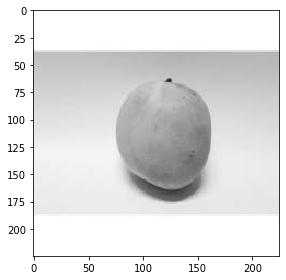

In [4]:
#convert RGB ke Grayscale
gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
imshow(gambar_gray)

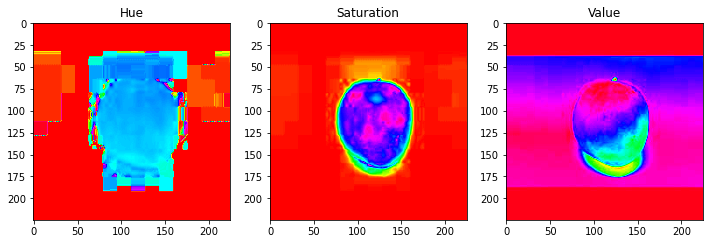

In [5]:
#convert RGB ke HSV
#gambar_hsv = cv2.cvtColor(gambar, cv2.COLOR_BGR2HSV)
gambar_hsv = rgb2hsv(gambar)
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(gambar_hsv[:,:,0], cmap='hsv')
ax[0].set_title('Hue')
ax[1].imshow(gambar_hsv[:,:,1], cmap='hsv')
ax[1].set_title('Saturation')
ax[2].imshow(gambar_hsv[:,:,2], cmap='hsv')
ax[2].set_title('Value');

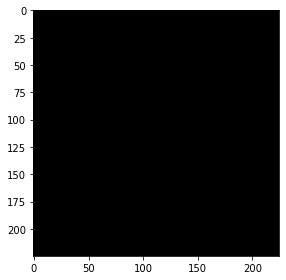

In [6]:
lower_mask = gambar_hsv[:,:,0] > 100
upper_mask = gambar_hsv[:,:,0] < 110
saturation_mask = gambar_hsv[:,:,1] > 50 
 
mask = upper_mask*lower_mask*saturation_mask
red = gambar[:,:,0]*mask
green = gambar[:,:,1]*mask
blue = gambar[:,:,2]*mask
gambar_masked = np.dstack((red,green,blue))
imshow(gambar_masked)

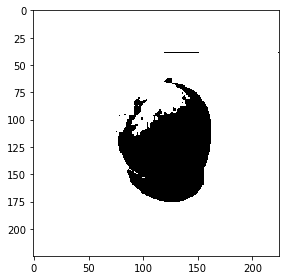

In [7]:
#Grayscale ke Threshold
thresh = 175
ret,gambar_thresh = cv2.threshold(gambar_gray, thresh, 255, cv2.THRESH_BINARY)
imshow(gambar_thresh)

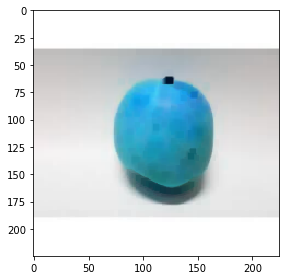

In [8]:
#Threshold ke Image Morphology
#for i in range(1):
    #threshold_morphology = morphology.binary_dilation(threshold)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(gambar,kernel,iterations = 1)
imshow(erosion)
    
#Color Segmentation ke Image Morphology    
for i in range(1):
    color_morphology = morphology.binary_dilation(gambar_masked)

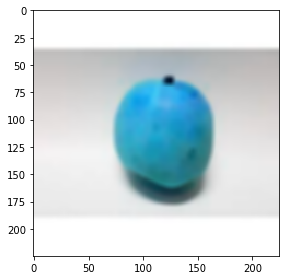

In [9]:
# Gaussian Blur
blur = cv2.GaussianBlur(erosion,(5,5),cv2.BORDER_DEFAULT)
imshow(blur)

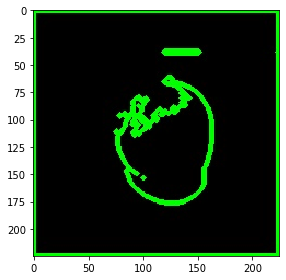

In [10]:
#Find Contours
contours, hierarchy = cv2.findContours(gambar_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = np.zeros(gambar.shape)
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
cv2.imwrite('./mangga countours.jpg',img_contours)

gambar_countours = cv2.imread('./mangga countours.jpg')
imshow(gambar_countours)

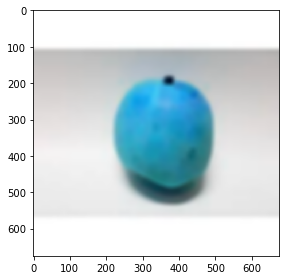

In [13]:
#Scalling
gambar_scale = cv2.resize(blur, (0, 0), fx=3, fy=3)
imshow(gambar_scale)